In [108]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle Code"></form>''')

In [109]:
"""Per Jon's latest email, it would be good to visualize Disney's (and to a lesser extent, Sony's) changing marketshare 
    against the overall box office market. Is the box office market growin, and Disney with it? Or is Disney simply capturing more 
    of the market? """
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as Dates
import datetime
import numpy as np
import os
os.chdir(r'C:\Users\Nate P\Desktop\Rotten Tomatoes Movies Analysis\Disney Vs US Box Office')

<h1> Hello </h1>
<h2> <em>Hello, but smaller</em> </h2>

In [110]:
"""Read in csv files"""
disney_df = pd.read_csv('disney_df.csv')
sony_df = pd.read_csv('sony_df.csv')
tcentury_fox_df = pd.read_csv('twentieth_century_fox_df.csv')
universal_df = pd.read_csv('universal_df.csv')
warner_bros_df = pd.read_csv('warner_bros_df.csv')
# Will need the inflation-adjusted total box office gross later
domestic_box_office_df = pd.read_csv('domestic_box_office_df.csv')

In [111]:
#domestic_box_office_df.columns

In [112]:
#disney_df.columns

In [113]:
# Helper functions. Convert to datetime AND convert string to integer
def clean_market_share(percentage):
    """ Market Share is in a percentage, but reads as a string. Need to convert to int for matplotlib to handle properly"""
    """Tested and function works"""
    return float(percentage.strip('%'))
def convert_to_datetime(year):
    """Convert the dates to datetime"""
    return datetime.date(int(year), 1, 1)
def convert_to_int(box_office):
    """Inflation adjusted values are in strings. Function converts to int"""
    return int(box_office.strip('$').replace(',',''))
def reverse(series):
    """Function to reverse a list. Why? Because domestic box office dataframe needs to be flipped"""
    series_list = list(series)
    for i in range(len(series_list)):
        series_list.insert(i, series_list.pop())
    return series_list

In [114]:
#"""To properly plot, will need to cumulative sum box office results for five major studios (IN ORDER TO CALCULATE 'OTHER',
#    I WILL NEED THE TOTAL BOX OFFICE GROSS)"""

In [115]:
#"""Columns in domestic box office dataframe. Useful for knowing names to reverse"""
#domestic_box_office_df.columns

In [116]:
#"""Need to fix domestic_box_office_df; it is 2020 backwards, need it going 1995 forward
#    Step 1: Reverse each column. Save as new list"""
domestic_box_office_reverse_year = reverse(domestic_box_office_df['Year'])
domestic_box_office_tickets_sold_reverse = reverse(domestic_box_office_df['Tickets Sold'])
domestic_box_office_gross_box_office_reverse = reverse(domestic_box_office_df['Gross Box Office'])
domestic_box_office_gross_inflation_adjusted_office_reverse = reverse(domestic_box_office_df['Gross Inflation Adjusted Box Office'])
domestic_box_office_average_ticket_price_reverse = reverse(domestic_box_office_df['Average Ticket Price'])

In [117]:
#"""Step 2: Create dataframe out of new lists. Use previous column names"""

domestic_box_office_df_reverse = pd.DataFrame([domestic_box_office_reverse_year,domestic_box_office_tickets_sold_reverse,
                                              domestic_box_office_gross_box_office_reverse,domestic_box_office_gross_inflation_adjusted_office_reverse,
                                              domestic_box_office_average_ticket_price_reverse]).T
domestic_box_office_df_reverse.columns = domestic_box_office_df.columns

#print(domestic_box_office_df_reverse.head())
#print(domestic_box_office_df.tail())

In [118]:
"""Attempt one: Create a plotable Series where the inflation-adjusted box-office gross totals cumulatively 'build' off each other"""
tcentury_fox_plot_series = tcentury_fox_df['Inflation-Adjusted Gross'].apply(convert_to_int)
universal_plot_series = universal_df['Inflation-Adjusted Gross'].apply(convert_to_int) + tcentury_fox_plot_series
sony_plot_series = sony_df['Inflation-Adjusted Gross'].apply(convert_to_int) + universal_plot_series
warner_bros_plot_series = warner_bros_df['Inflation-Adjusted Gross'].apply(convert_to_int) + sony_plot_series
disney_plot_series = disney_df['Inflation-Adjusted Gross'].apply(convert_to_int) + warner_bros_plot_series
domestic_total_plot_series = domestic_box_office_df_reverse['Gross Inflation Adjusted Box Office'].apply(convert_to_int)

# Year (used for x-axis)
x_axis_year = disney_df['Year'].apply(convert_to_datetime)
x_axis_year_2 = domestic_box_office_df['Year'].apply(convert_to_datetime)
# Did this work? Only way to find out, with a plot

#print(len(x_axis_year))
#print(len(disney_plot_series))

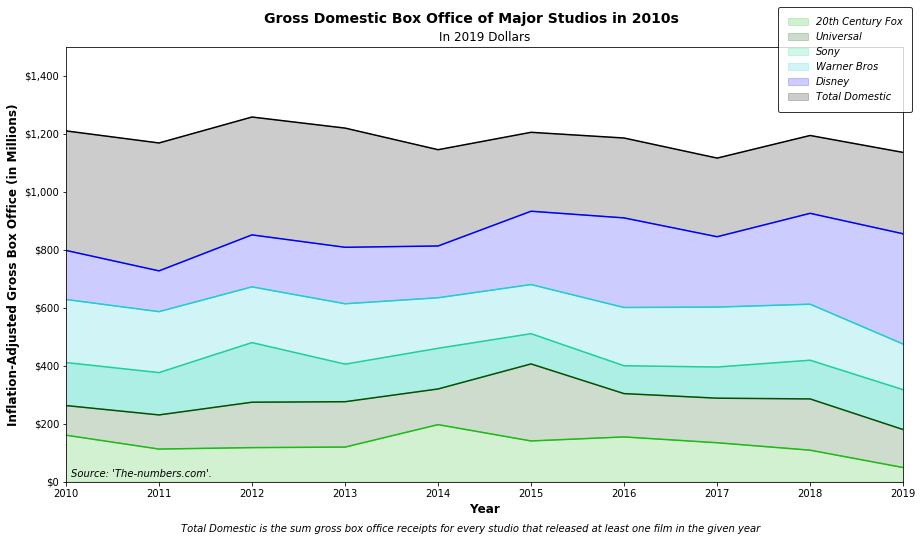

"Although Box Office Total has steadily fallen since its highs in the mid-2000s (potentially due to the advent of DVDs,\nOnDemand, and eventually streaming), Disney's share of the market has increased, suggesting it is capturing revenue that \npreviously went to other studios. "

In [119]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.plot(x_axis_year, domestic_total_plot_series, color = 'black')
ax.plot(x_axis_year, disney_plot_series, color = 'blue')
ax.plot(x_axis_year, warner_bros_plot_series, color = '#1DCFD2')
ax.plot(x_axis_year, sony_plot_series,color = '#1DD298')
ax.plot(x_axis_year, universal_plot_series,color = '#065101')
ax.plot(x_axis_year, tcentury_fox_plot_series, color = '#1EBB14')

"""Shade between lines, made to represent market share %. Note how Disneys increases in recent years"""
ax.fill_between(x_axis_year, tcentury_fox_plot_series, color = '#1EBB14', alpha = 0.2,  label = '20th Century Fox')
ax.fill_between(x_axis_year, universal_plot_series, tcentury_fox_plot_series, color = '#065101', alpha = 0.2, label = 'Universal')
ax.fill_between(x_axis_year, sony_plot_series, universal_plot_series, color = '#1DD298', alpha = 0.2, label = 'Sony')
ax.fill_between(x_axis_year, universal_plot_series, warner_bros_plot_series, color = '#1DCFD2', alpha = 0.2, label = 'Warner Bros')
ax.fill_between(x_axis_year, warner_bros_plot_series, disney_plot_series, color = 'blue', alpha = 0.2, label = 'Disney')
ax.fill_between(x_axis_year, domestic_total_plot_series, disney_plot_series, color = 'black', alpha = 0.2, label = 'Total Domestic')

# Set x limits to only go from 1995 to 2019
ax.set_xlim(Dates.date2num(datetime.date(2010,1,1)), Dates.date2num(datetime.date(2019,1,1)))
#ax.set_xticks([datetime.date(x,1,1,) for x in range(1995,2020)])
#ax.set_xticklabels([x for x in range(1995,2020)])
ax.set_ylim(0, 15000000000)
ax.set_yticklabels(["${:,}".format(x) for x in [0, 200, 400, 600, 800, 1000, 1200, 1400]])
ax.set_ylabel('Inflation-Adjusted Gross Box Office (in Millions)', fontsize = 12, fontweight = 'bold')
ax.set_xlabel('Year', fontsize = 12, fontweight = 'bold')



"""Annotate 'Source' note in italitcs"""
ax.annotate("Source: 'The-numbers.com'.", xy = (5,5), xycoords = 'axes points', fontstyle = 'italic') 
ax.annotate("Total Domestic is the sum gross box office receipts for every studio that released at least one film in the given year", 
           xy = (115, -50), xycoords = "axes points", fontstyle = 'italic')
ax.legend(loc = (.85,.85), edgecolor = 'inherit', prop = {'size':10,'style':'italic'}, borderpad = 1)
fig.suptitle('Gross Domestic Box Office of Major Studios in 2010s', fontsize = 14, fontweight = 'bold', y = 0.94)
ax.set_title('In 2019 Dollars', x = .5)
plt.show()

fig.savefig('Box Office Market Share v3.0.png')

"""Although Box Office Total has steadily fallen since its highs in the mid-2000s (potentially due to the advent of DVDs,
OnDemand, and eventually streaming), Disney's share of the market has increased, suggesting it is capturing revenue that 
previously went to other studios. """






(0.0, 1.0, 0.0, 1.0)

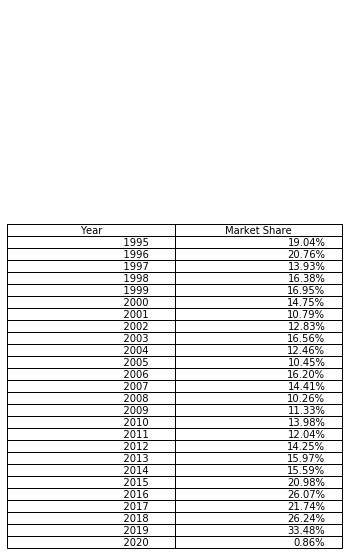

In [120]:
"""Create a Table using MatPlotLib showing Disneys market share increase"""
disney_market_share = disney_df['Inflation-Adjusted Gross'].apply(convert_to_int) / domestic_box_office_df_reverse['Gross Inflation Adjusted Box Office'].apply(convert_to_int)
disney_market_share = (disney_market_share * 100).apply('{:.2f}%'.format)
plt.table(cellText = data, colLabels = ['Year','Market Share'], snap = True)
plt.axis('off')

In [121]:
(disney_market_share * 100).apply('{:.2f}%'.format)

ValueError: Unknown format code 'f' for object of type 'str'

In [104]:
years = range(1995, 2021)
data = [['   ' + str(x) + '   '] for x in years]
for i in range(len(disney_market_share)):
    data[i].append(disney_market_share[i])

data

[['   1995   ', '19.04%'],
 ['   1996   ', '20.76%'],
 ['   1997   ', '13.93%'],
 ['   1998   ', '16.38%'],
 ['   1999   ', '16.95%'],
 ['   2000   ', '14.75%'],
 ['   2001   ', '10.79%'],
 ['   2002   ', '12.83%'],
 ['   2003   ', '16.56%'],
 ['   2004   ', '12.46%'],
 ['   2005   ', '10.45%'],
 ['   2006   ', '16.20%'],
 ['   2007   ', '14.41%'],
 ['   2008   ', '10.26%'],
 ['   2009   ', '11.33%'],
 ['   2010   ', '13.98%'],
 ['   2011   ', '12.04%'],
 ['   2012   ', '14.25%'],
 ['   2013   ', '15.97%'],
 ['   2014   ', '15.59%'],
 ['   2015   ', '20.98%'],
 ['   2016   ', '26.07%'],
 ['   2017   ', '21.74%'],
 ['   2018   ', '26.24%'],
 ['   2019   ', '33.48%'],
 ['   2020   ', '0.86%']]

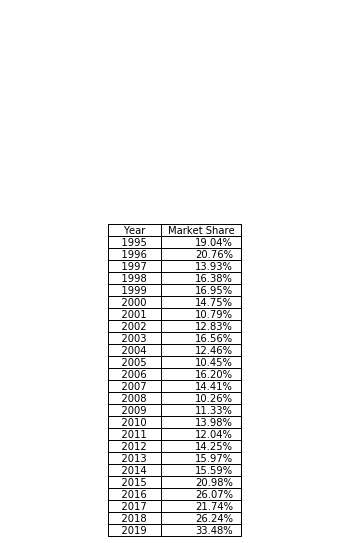

In [106]:
"""Finer control over the table. 'Data' variable has years and Disney's market share in each year"""
table = plt.table(cellText = data[:len(data) - 1], colLabels = ['Year','Market Share'], snap = True)
plt.axis('off')
type(table)
table.auto_set_column_width([0,1])
table.scale(xscale = .6, yscale = 1)


In [ ]:
"""Initial graph appears as hoped, except for early on. Were all the studios this close in 1995? I doubt it"""
print(tcentury_fox_df.tail())

In [ ]:
print(tcentury_fox_df['Inflation-Adjusted Gross'].head())
print(sony_df['Inflation-Adjusted Gross'].head())
print(universal_df['Inflation-Adjusted Gross'].head())
print(disney_df['Inflation-Adjusted Gross'].head())
print(warner_bros_df['Inflation-Adjusted Gross'].head())

In [ ]:
print(tcentury_fox_plot_series[0])
print(universal_plot_series[0])
print(sony_plot_series[0])
print(warner_bros_plot_series[0])

print(disney_plot_series[0])

In [ ]:
disney_df['Year'] == domestic_box_office_df['Year']

In [ ]:
disney_df['Year']

In [ ]:
domestic_box_office_df['Year']

In [ ]:
for x in range(1995,2020):
    print(x)
    

In [93]:
'${:,}'.format(2000)

'$2,000'